In [167]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import json

%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 노란색 글씨의 warining 문구 강제 생략
import warnings
warnings.filterwarnings(action='ignore')
    

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


print('numpy version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 크롤링
from bs4                        import BeautifulSoup
from urllib.request             import urlopen , urlretrieve
from urllib.error               import HTTPError
from urllib.error               import URLError

import requests
import re



# ai lib

import sklearn
from   sklearn.datasets          import load_iris , load_breast_cancer

from   sklearn.tree              import DecisionTreeClassifier
from   sklearn.neighbors         import KNeighborsClassifier

from   sklearn.metrics           import accuracy_score , classification_report
from   sklearn.model_selection   import train_test_split , GridSearchCV , KFold , StratifiedKFold , cross_val_score , cross_validate
from   sklearn.preprocessing     import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler

numpy version -  1.21.5
pandas version -  1.4.2


### DecisionTreeClassifier()
- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- max_depth : 트리의 최대 깊이 (값이 클수록 모델의 복잡도가 올라간다.)
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- max_leaf_nodes : 리프 노드의 최대수
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부

- 모델을 만들고 학습하는 단계에서 모델의 검증 정확도를 높이기 위한 교차 검증 선행될 수 있다.
- 이러한 교차검증을 통해서 모델의 오버피팅(과대적합)을 막을 수 있다.
- 교차검증(분류에서 데이터의 편중을 막기위해서 , 회귀는 연속값이기 때문에 사용할 수 없다.)

In [6]:
import seaborn as sns
iris = load_iris()
print('type -' , type(iris))
print('keys -' , iris.keys())

type - <class 'sklearn.utils.Bunch'>
keys - dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
print('데이터 분리 - ')
X_train , X_test , y_train , y_test = train_test_split ( iris.data 
                                                       , iris.target
                                                        # 테스트 데이터의 비율 20퍼센트
                                                       , test_size = 0.2
                                                        # 데이터 셔플
                                                       , shuffle   = True
                                                       , random_state = 200)
print('shqpe - ' , X_train , X_test , y_train , y_test)

데이터 분리 - 
shqpe -  [[5.1 3.4 1.5 0.2]
 [5.7 2.8 4.1 1.3]
 [5.8 2.6 4.  1.2]
 [5.  3.6 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.3 3.7 1.5 0.2]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [6.1 3.  4.9 1.8]
 [6.7 3.1 4.7 1.5]
 [5.6 3.  4.1 1.3]
 [4.8 3.  1.4 0.1]
 [5.1 3.7 1.5 0.4]
 [5.6 3.  4.5 1.5]
 [5.7 2.5 5.  2. ]
 [6.  2.2 5.  1.5]
 [7.7 3.  6.1 2.3]
 [5.  3.  1.6 0.2]
 [6.8 3.2 5.9 2.3]
 [6.3 2.3 4.4 1.3]
 [7.7 2.6 6.9 2.3]
 [5.8 2.7 4.1 1. ]
 [6.4 2.9 4.3 1.3]
 [5.6 2.7 4.2 1.3]
 [5.6 2.8 4.9 2. ]
 [5.5 3.5 1.3 0.2]
 [6.  2.7 5.1 1.6]
 [5.6 2.5 3.9 1.1]
 [6.1 2.8 4.7 1.2]
 [6.3 2.8 5.1 1.5]
 [4.4 2.9 1.4 0.2]
 [5.  3.3 1.4 0.2]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [6.5 3.  5.8 2.2]
 [6.1 3.  4.6 1.4]
 [5.1 3.8 1.6 0.2]
 [5.  3.5 1.6 0.6]
 [5.8 2.7 5.1 1.9]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [7.2 3.2 6.  1.8]
 [6.3 2.9 5.6 1.8]
 [6.1 2.8 4.  1.3]
 [6.7 3.1 4.4 1.4]
 [5.9 3.  5.1 1.8]
 [5.  3.5 1.3 0.3]
 [5.4 3.9 1.7 0.4]
 [7.9 3.8 6.4 2. ]
 [4.9 2.4 3.3 1. ]
 [4.8 3.1 1.

In [10]:

X_train , X_val , y_train , y_val = train_test_split (  X_train
                                                       , y_train
                                                        # 테스트 데이터의 비율 20퍼센트
                                                       , test_size = 0.2
                                                        # 데이터 셔플
                                                       , shuffle   = True
                                                       , random_state = 200)
print('shqpe - ' , X_train , X_val , y_train , y_val)

shqpe -  [[5.2 3.5 1.5 0.2]
 [6.5 3.  5.5 1.8]
 [4.4 3.  1.3 0.2]
 [5.8 2.7 5.1 1.9]
 [6.3 2.3 4.4 1.3]
 [6.1 3.  4.9 1.8]
 [5.9 3.  4.2 1.5]
 [6.1 2.6 5.6 1.4]
 [5.  3.4 1.5 0.2]
 [6.7 3.  5.  1.7]
 [6.3 2.9 5.6 1.8]
 [6.1 2.8 4.7 1.2]
 [6.  2.2 4.  1. ]
 [5.1 3.8 1.6 0.2]
 [6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]
 [5.1 3.5 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [5.  3.  1.6 0.2]
 [7.9 3.8 6.4 2. ]
 [6.5 3.  5.2 2. ]
 [5.  3.4 1.6 0.4]
 [4.9 3.6 1.4 0.1]
 [5.3 3.7 1.5 0.2]
 [6.4 3.2 5.3 2.3]
 [6.  3.4 4.5 1.6]
 [6.2 2.2 4.5 1.5]
 [5.5 4.2 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [6.9 3.1 5.4 2.1]
 [5.9 3.2 4.8 1.8]
 [6.3 2.8 5.1 1.5]
 [6.5 2.8 4.6 1.5]
 [5.7 2.6 3.5 1. ]
 [4.4 2.9 1.4 0.2]
 [4.9 2.4 3.3 1. ]
 [7.1 3.  5.9 2.1]
 [5.5 3.5 1.3 0.2]
 [5.5 2.6 4.4 1.2]
 [6.2 2.9 4.3 1.3]
 [6.  3.  4.8 1.8]
 [7.6 3.  6.6 2.1]
 [4.8 3.  1.4 0.3]
 [4.6 3.4 1.4 0.3]
 [5.6 2.9 3.6 1.3]
 [4.6 3.1 1.5 0.2]
 [6.2 3.4 5.4 2.3]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 4.9 1.5]
 [5.1 3.5 1.4 0.3]
 [6.7 3.  5.2 2.3]
 [6.4 3.2 4.5 1.5]
 [6

In [17]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((96, 4), (30, 4), (96,), (30,))

In [16]:
features = iris.data
target   = iris.target

In [21]:
from sklearn.model_selection import KFold

# 이 교차 검증의 몇 개의 kfold를 만들지 지정

fold = KFold(n_splits = 5)
features.shape[0]

150

In [31]:
tree_model = DecisionTreeClassifier()
cnt = 0
cv_accuracy = []
for train_idx , test_idx in fold.split(features) :
    #print('train - ' , train_idx , 'test - ' , 'test_idx')
    X_train , X_test = features[train_idx] , features[test_idx]
    y_train , y_test = target[train_idx]   , target[test_idx]
    tree_model.fit(X_train , y_train)
    
    fold_predict = tree_model.predict(X_test)
    
    cnt += 1
    
    accuracy = accuracy_score(y_test , fold_predict)
    cv_accuracy.append(accuracy)
    print(f'{cnt} set : 교차검증 정확도 {accuracy} , train_data size {X_train.shape[0]} , validation-size {X_test.shape[0]}')
    print(f'{cnt} set , 검증인덱스 {train_idx}')
    print(f'{cnt} set , 검증인덱스 {test_idx}')
    print()

    
print()
print('모델의 평균 검증정확도 - ' , np.mean(cv_accuracy))

1 set : 교차검증 정확도 1.0 , train_data size 120 , validation-size 30
1 set , 검증인덱스 [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
1 set , 검증인덱스 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 set : 교차검증 정확도 1.0 , train_data size 120 , validation-size 30
2 set , 검증인덱스 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90 

In [39]:
target_series = pd.Series(target)
target_series.value_counts()

0    50
1    50
2    50
dtype: int64

- 레이블에 대한 분포를 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터세트를 분배하는 교차검증이 필요
- StratifildKFOLD -> 기존 KFold 방식의 불균형한 분포를 개선시켜준다.

In [50]:
from sklearn.model_selection import StratifiedKFold



print('문제점 확인 후 개선 - ')

fold = StratifiedKFold(n_splits = 3)
cnt = 0
cv_accuracy = []

for train_idx , test_idx in fold.split(features , target) :
    #print('train - ' , train_idx , 'test - ' , 'test_idx')
    X_train , X_test = features[train_idx] , features[test_idx]
    y_train , y_test = target[train_idx]   , target[test_idx]
    
    tree_model.fit(X_train , y_train)
    fold_predict = tree_model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test , fold_predict)
    cv_accuracy.append(accuracy)
    
    
    label_train = pd.Series(target[train_idx]).value_counts()
    label_test  = pd.Series(target[test_idx]).value_counts()
    cnt += 1
    
    print(f'{cnt}set')
    print(f'학습레이블 분포 - {label_train}')
    print(f'검증레이블 분포 - {label_test}')
    print()

    
print('교차검증의 정확도 - ' , cv_accuracy)
print('평균검증의 정확도 - ' , np.mean(cv_accuracy))


문제점 확인 후 개선 - 
1set
학습레이블 분포 - 2    34
0    33
1    33
dtype: int64
검증레이블 분포 - 0    17
1    17
2    16
dtype: int64

2set
학습레이블 분포 - 1    34
0    33
2    33
dtype: int64
검증레이블 분포 - 0    17
2    17
1    16
dtype: int64

3set
학습레이블 분포 - 0    34
1    33
2    33
dtype: int64
검증레이블 분포 - 1    17
2    17
0    16
dtype: int64

교차검증의 정확도 -  [0.98, 0.94, 0.98]
평균검증의 정확도 -  0.9666666666666667


- 교차검증을 간단하게 : cross_val_score() , cross_vaildate()
- cross_val_score(모델 , 피처 , 타켓, 분류예측성능평가 지표, 교차검증 폴드 수)
- cross_validate (모델 , 피처 , 타켓, 분류예측성능평가 지표, 교차검증 폴드 수)

In [53]:
from sklearn.model_selection import cross_val_score , cross_validate

In [99]:
# 교차검증 
# cross_val_score
# ndarray 형식으로 출력

scores = cross_val_score(tree_model , features , target , scoring = 'accuracy' , cv = 5 )
print('type - ' , type(scores))
print('교차검증별 정확도 - ' , scores)
print('평균검증별 정확도 - ' , round(np.mean(scores) ,2))

type -  <class 'numpy.ndarray'>
교차검증별 정확도 -  [0.96666667 0.96666667 0.9        0.96666667 1.        ]
평균검증별 정확도 -  0.96


In [102]:
# 교차검증
# cross_validate
# dictnory 형식으로 출력

scores = cross_validate(tree_model , features , target , scoring = 'accuracy' , cv = 5 )
print('type - ' , type(scores))
print('교차검증별 정확도 - ' , scores['test_score'])
print('평균검증별 정확도 - ' , round(np.mean(scores['test_score']) ,2))

type -  <class 'dict'>
교차검증별 정확도 -  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
평균검증별 정확도 -  0.95


- 교차검증과 하이퍼 파라미터 튜닝을 위한 : GridSearchCV
- 하이퍼 파라미터 : 사용자에 의해서 값을 변경할 수 있는 파라미터
- 파라미터란 어떤 특정한 값을 의미한다. (파이 = 3.141592... -> 값을 변경 불가 -> 그냥 파라미터)
- GridSearchCV 
    - 피쳐의 중요도 확인 가능
- tree model parameter : 루트를 기준으로 각각의 노드들을 if else 구문으로 나눈 것

In [105]:
from sklearn.model_selection import GridSearchCV

In [109]:
# criterion : 불순도

params = {
    'criterion' : ['gini' , 'entropy'] ,
    'splitter'  : ['best' , 'random']  ,
    'max_depth' : [1, 2, 3]            ,
    'min_samples_split' : [2 , 3]      ,
    
}

print('데이터 분리 - ')
X_train , X_test , y_train , y_test = train_test_split ( iris.data 
                                                       , iris.target
                                                        # 테스트 데이터의 비율 20퍼센트
                                                       , test_size = 0.2
                                                        # 데이터 셔플
                                                       , shuffle   = True
                                                       , random_state = 200)

tree_model = DecisionTreeClassifier(random_state = 100)
grid_tree_model = GridSearchCV(tree_model , param_grid = params , cv = 5 , refit = True)
grid_tree_model.fit(X_train , y_train)
grid_tree_model.cv_results_


데이터 분리 - 


{'mean_fit_time': array([0.00100036, 0.0010004 , 0.        , 0.00040007, 0.00060115,
        0.00100017, 0.00080056, 0.        , 0.        , 0.        ,
        0.00079994, 0.0006    , 0.00019999, 0.00100002, 0.00099988,
        0.00060019, 0.00099969, 0.00080009, 0.00020003, 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'std_fit_time': array([6.32937547e-04, 6.33013010e-04, 0.00000000e+00, 4.89981562e-04,
        4.90846350e-04, 5.43678010e-07, 4.00281844e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.99971037e-04, 4.89901707e-04,
        3.99971008e-04, 1.90734863e-07, 2.33601546e-07, 4.90057117e-04,
        7.83523403e-07, 7.48442917e-04, 4.00066376e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 'mean_score_time': array([0.00020003, 0.00040021, 0.00060005, 0.00060005, 0.00039878,
        0.        , 0.00019989, 0.00019999, 0.00060005, 0.00060034,
        0.0001987 , 0.00019951, 0.        , 0.00

In [112]:
grid_info_frm = pd.DataFrame(grid_tree_model.cv_results_)
grid_info_frm.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.000200,4.000664e-04,0.000600,0.000490,entropy,2,3,best,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,1
4,0.000601,4.908464e-04,0.000399,0.000488,gini,2,2,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,1
16,0.001000,7.835234e-07,0.000000,0.000000,entropy,2,2,best,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,1
6,0.000801,4.002818e-04,0.000200,0.000400,gini,2,3,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,1
20,0.000000,0.000000e+00,0.000000,0.000000,entropy,3,2,best,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.916667,0.958333,1.000000,0.791667,0.875000,0.908333,0.071686,5
22,0.000000,0.000000e+00,0.000600,0.000490,entropy,3,3,best,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.916667,0.958333,1.000000,0.791667,0.875000,0.908333,0.071686,5
8,0.000000,0.000000e+00,0.000600,0.000490,gini,3,2,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.875000,0.908333,0.071686,5
10,0.000800,3.999710e-04,0.000199,0.000397,gini,3,3,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.875000,0.908333,0.071686,5
11,0.000600,4.899017e-04,0.000200,0.000399,gini,3,3,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.791667,0.916667,0.875000,0.875000,0.791667,0.850000,0.050000,9
21,0.000000,0.000000e+00,0.000000,0.000000,entropy,3,2,random,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.791667,0.916667,0.875000,0.875000,0.791667,0.850000,0.050000,9


In [114]:
# 가장 뛰어난 모델 찾기

print('best estimator - ' , grid_tree_model.best_estimator_)
print('best parameter - ' , grid_tree_model.best_params_)
print('best score     - ' , grid_tree_model.best_score_)

best estimator -  DecisionTreeClassifier(max_depth=2, random_state=100)
best parameter -  {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'splitter': 'best'}
best score -  0.9166666666666666


In [116]:
estimator = grid_tree_model.best_estimator_
y_predict = estimator.predict(X_test)

In [118]:
print('answer  - ' , y_test)
print('predict - ' , y_predict)
print()
print('accuracy - ' , accuracy_score(y_test , y_predict))

answer  -  [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]
predict -  [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

accuracy -  1.0


In [121]:
print('피어의 중요도 - ')
print('트리 분류형성에 각 피처가 얼마나 잘 작용했는지를 평가하는 지표')
print('해당 지표는 0 ~ 1 사이의 값을 가지며 , 0 이면 특성이 전혀 고려되지 않았다라는 것이다.')
print()
print('feature importance - ' , estimator.feature_importances_)

피어의 중요도 - 
트리 분류형성에 각 피처가 얼마나 잘 작용했는지를 평가하는 지표
해당 지표는 0 ~ 1 사이의 값을 가지며 , 0 이면 특성이 전혀 고려되지 않았다라는 것이다.

feature importance -  [0.         0.         0.57087415 0.42912585]


시각화 - 


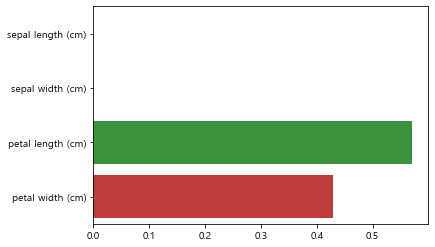

In [126]:
print('시각화 - ')

sns.barplot( x = estimator.feature_importances_ , y = iris.feature_names)

plt.show()
plt.close()

In [127]:
for name , value in zip(iris.feature_names , estimator.feature_importances_) :
    print(name , '\t' , value) 

sepal length (cm) 	 0.0
sepal width (cm) 	 0.0
petal length (cm) 	 0.5708741479015743
petal width (cm) 	 0.4291258520984258


- breast_cancer 데이터를 이용한 분류예측 수행

In [132]:
cancer = load_breast_cancer()
print('type' , type(cancer))
print('keys' , cancer.keys())

type <class 'sklearn.utils.Bunch'>
keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [133]:
print(' 1 , 데이터프레임 만들기(feature + targer)')

 1 , 데이터프레임 만들기(feature + targer)


In [135]:
print('DecisionTreeClassifier Estimator - ')
print('2. 데이터 분리 (train : 7 , test : 3)')
print('3. 학습(fit) , 예측(predict)')
print('4. 모델의 정확도 평가 - accuracy_score()')

DecisionTreeClassifier Estimator - 
2. 데이터 분리 (train : 7 , test : 3)
3. 학습(fit) , 예측(predict)
4. 모델의 정확도 평가 - accuracy_score()


In [136]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [137]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [154]:
cancer_frm = pd.DataFrame( cancer.data , 
              columns = cancer.feature_names)
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [158]:
X_train , X_test , y_train , y_test = train_test_split ( cancer.data 
                                                       , cancer.target
                                                       , test_size = 0.2
                                                       , shuffle   = True
                                                       , random_state = 200)
print('shqpe - ' , X_train.shape , X_test.shape , y_train.shape , y_test.shape)

shqpe -  (455, 30) (114, 30) (455,) (114,)


In [161]:
tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [165]:
y_predict = tree_model.predict(X_test)
print('model answer - ' , y_predict[:10])
print('test  answer - ' , y_test[:10])
print('분류된 모델의 예측성능을 확인')
print('accuracy - ', accuracy_score(y_test , y_predict))

model answer -  [1 1 1 1 1 1 1 1 0 0]
test  answer -  [1 0 1 1 1 1 1 1 0 0]
분류된 모델의 예측성능을 확인
accuracy -  0.9210526315789473


- 데이터 전처리
- 인코딩(문자 -> 숫자) : 레이블 인코딩 , 원-핫-인코딩
- 주의점) 인코딩된 데이터를 회귀 X , 회귀는 숫자의 특성을 반영하기 때문에 
- 피처 스케일링(feature scaling) : 정규화(0 ~ 1 사이의 값으로 변환) , 표준화(가우시안 정규분포)
- 결측값 , 이상치

### LabelEncoder

In [175]:
# digit 변환
# LabelEncoder()

# 회귀 분석 과정에 숫자의 특성이 반영되면 값에 오류가 생긴다. -> 회귀 분석과정에서는 쓰면 안됨

label_items = ['낫또' , 'ABC주스' , '낫또' , '육개장' , '순대국밥']
encoder = LabelEncoder()
label_digit = encoder.fit(label_items).transform(label_items)
print('label_digit - ' , label_digit)
print('label       - ' , encoder.classes_)
print('label       - ' , encoder.inverse_transform([1,0,1,3,2]))

label_digit -  [1 0 1 3 2]
label       -  ['ABC주스' '낫또' '순대국밥' '육개장']
label       -  ['낫또' 'ABC주스' '낫또' '육개장' '순대국밥']


In [178]:
# LabelEncoder() 단점 보완 

print('레이블 인코딩의 단점을 보완하는 인코딩 - 원핫인코딩')
print('주의사항) 원핫인코딩을 위해서는 우선 문자열이 숫자형으로 변환되어야한다.(즉 , 레이블 인코딩 이후 사용가능하다.)')
print('주의사항) DaraFrame형식으로 나타나기 때문에 입력값으로 2차원 데이터가 필요하다.')

레이블 인코딩의 단점을 보완하는 인코딩 - 원핫인코딩
주의사항) 원핫인코딩을 위해서는 우선 문자열이 숫자형으로 변환되어야한다.(즉 , 레이블 인코딩 이후 사용가능하다.)
주의사항) DaraFrame형식으로 나타나기 때문에 입력값으로 2차원 데이터가 필요하다.


In [185]:
print('원핫인코딩 - ')
print()

# 1 레이블 인코딩

label_items = ['낫또' , 'ABC주스' , '낫또' , '육개장' , '순대국밥']
encoder = LabelEncoder()
label_digit = encoder.fit(label_items).transform(label_items)

# 원핫인코딩 진행을 위해 , 1차원 배열을 2차원으로 변환

input_data = label_digit.reshape(-1,1)
input_data

# 원핫인코딩
# 매칭되는 행열은 1로 나타난다.

oh_encoder = OneHotEncoder()
labels     = oh_encoder.fit_transform(input_data)
print('one-hot-encoder- ')
print(labels.toarray())

원핫인코딩 - 

one-hot-encoder- 
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [195]:
one_hot_frm = pd.DataFrame({
    'item' : ['낫또' , 'ABC주스' , '낫또' , '육개장' , '순대국밥']
})

In [196]:
pd.get_dummies(one_hot_frm)

,item_ABC주스,item_낫또,item_순대국밥,item_육개장
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0


In [197]:
iris_frm = pd.DataFrame(iris.data , 
                        columns = iris.feature_names)
iris_frm['target'] = iris.target
display(iris_frm )


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2



### 표준화
- 피처별 유닛의 단위가 다를 경우 표준화 혹은 정규화를 사용한다.


In [209]:
# 표준화는 가우시안 정규분포를 사용한다.

# 표준화
s_scaler = StandardScaler()
# 정규화
s_scaler = MinMaxScaler()


# target 칼럼 제거
s_iris   = s_scaler.fit_transform(iris_frm.iloc[: , :-1])
s_iris

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [207]:
standard_iris_frm = pd.DataFrame(data = s_iris , 
                                columns = iris.feature_names)
standard_iris_frm['target'] = iris.target
display(standard_iris_frm)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [213]:
cancer_frm
s_cancer = MinMaxScaler().fit_transform(cancer_frm)
pd.DataFrame(data = s_cancer ,
             columns = cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315
